<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2020-2021/Examens/20210702_Repesca_2nParcial_Solucions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: Repesca (programación / 2o parcial) 02/07/2021**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen. 
*   Renombra esa copia usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*) 
*   Rellena tu nombre, NIU i mail (gmail o mail del campus, si quieres recibir los comentarios/feedback acerca de tu examen) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/bkx9). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen es de 13h a 16h. No se aceptarán entregas pasada esa hora.
*   Sólo se puede tener el notebook del examen abierto para trabajar, mientras se realiza el examen, y se permitirá conectarse a https://docs.python.org/3/library/index.html para hacer consultas de Python, u otras webs de programación de referencia, así como las prácticas realizadas durante el curso.
<hr>

## **EXAMEN**

In [1]:
# Ejecuta esta parte de código para importar las librerías necesarias
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## <font color='green'>**> Ejercicio #1 [5 puntos]**</font>

Considera un mesón $\pi^0$​ desintegrándose a dos fotones en el centro de masas, donde los fotones viajan paralelos al eje y (es decir, con un ángulo de 180º, ver figura). Si la velocidad del sistema de referencia del laboratorio con respecto al centro de masas en el eje x es $\beta$, el ángulo $\theta$ de los dos fotones con el eje x visto en el laboratorio es

$$
\tan{\theta} = \frac{1}{\gamma \beta}
$$

Es decir, si el pión viaja hacia el observador, para ese decaimiento concreto, los fotones tienen un $boost$ en el eje x.


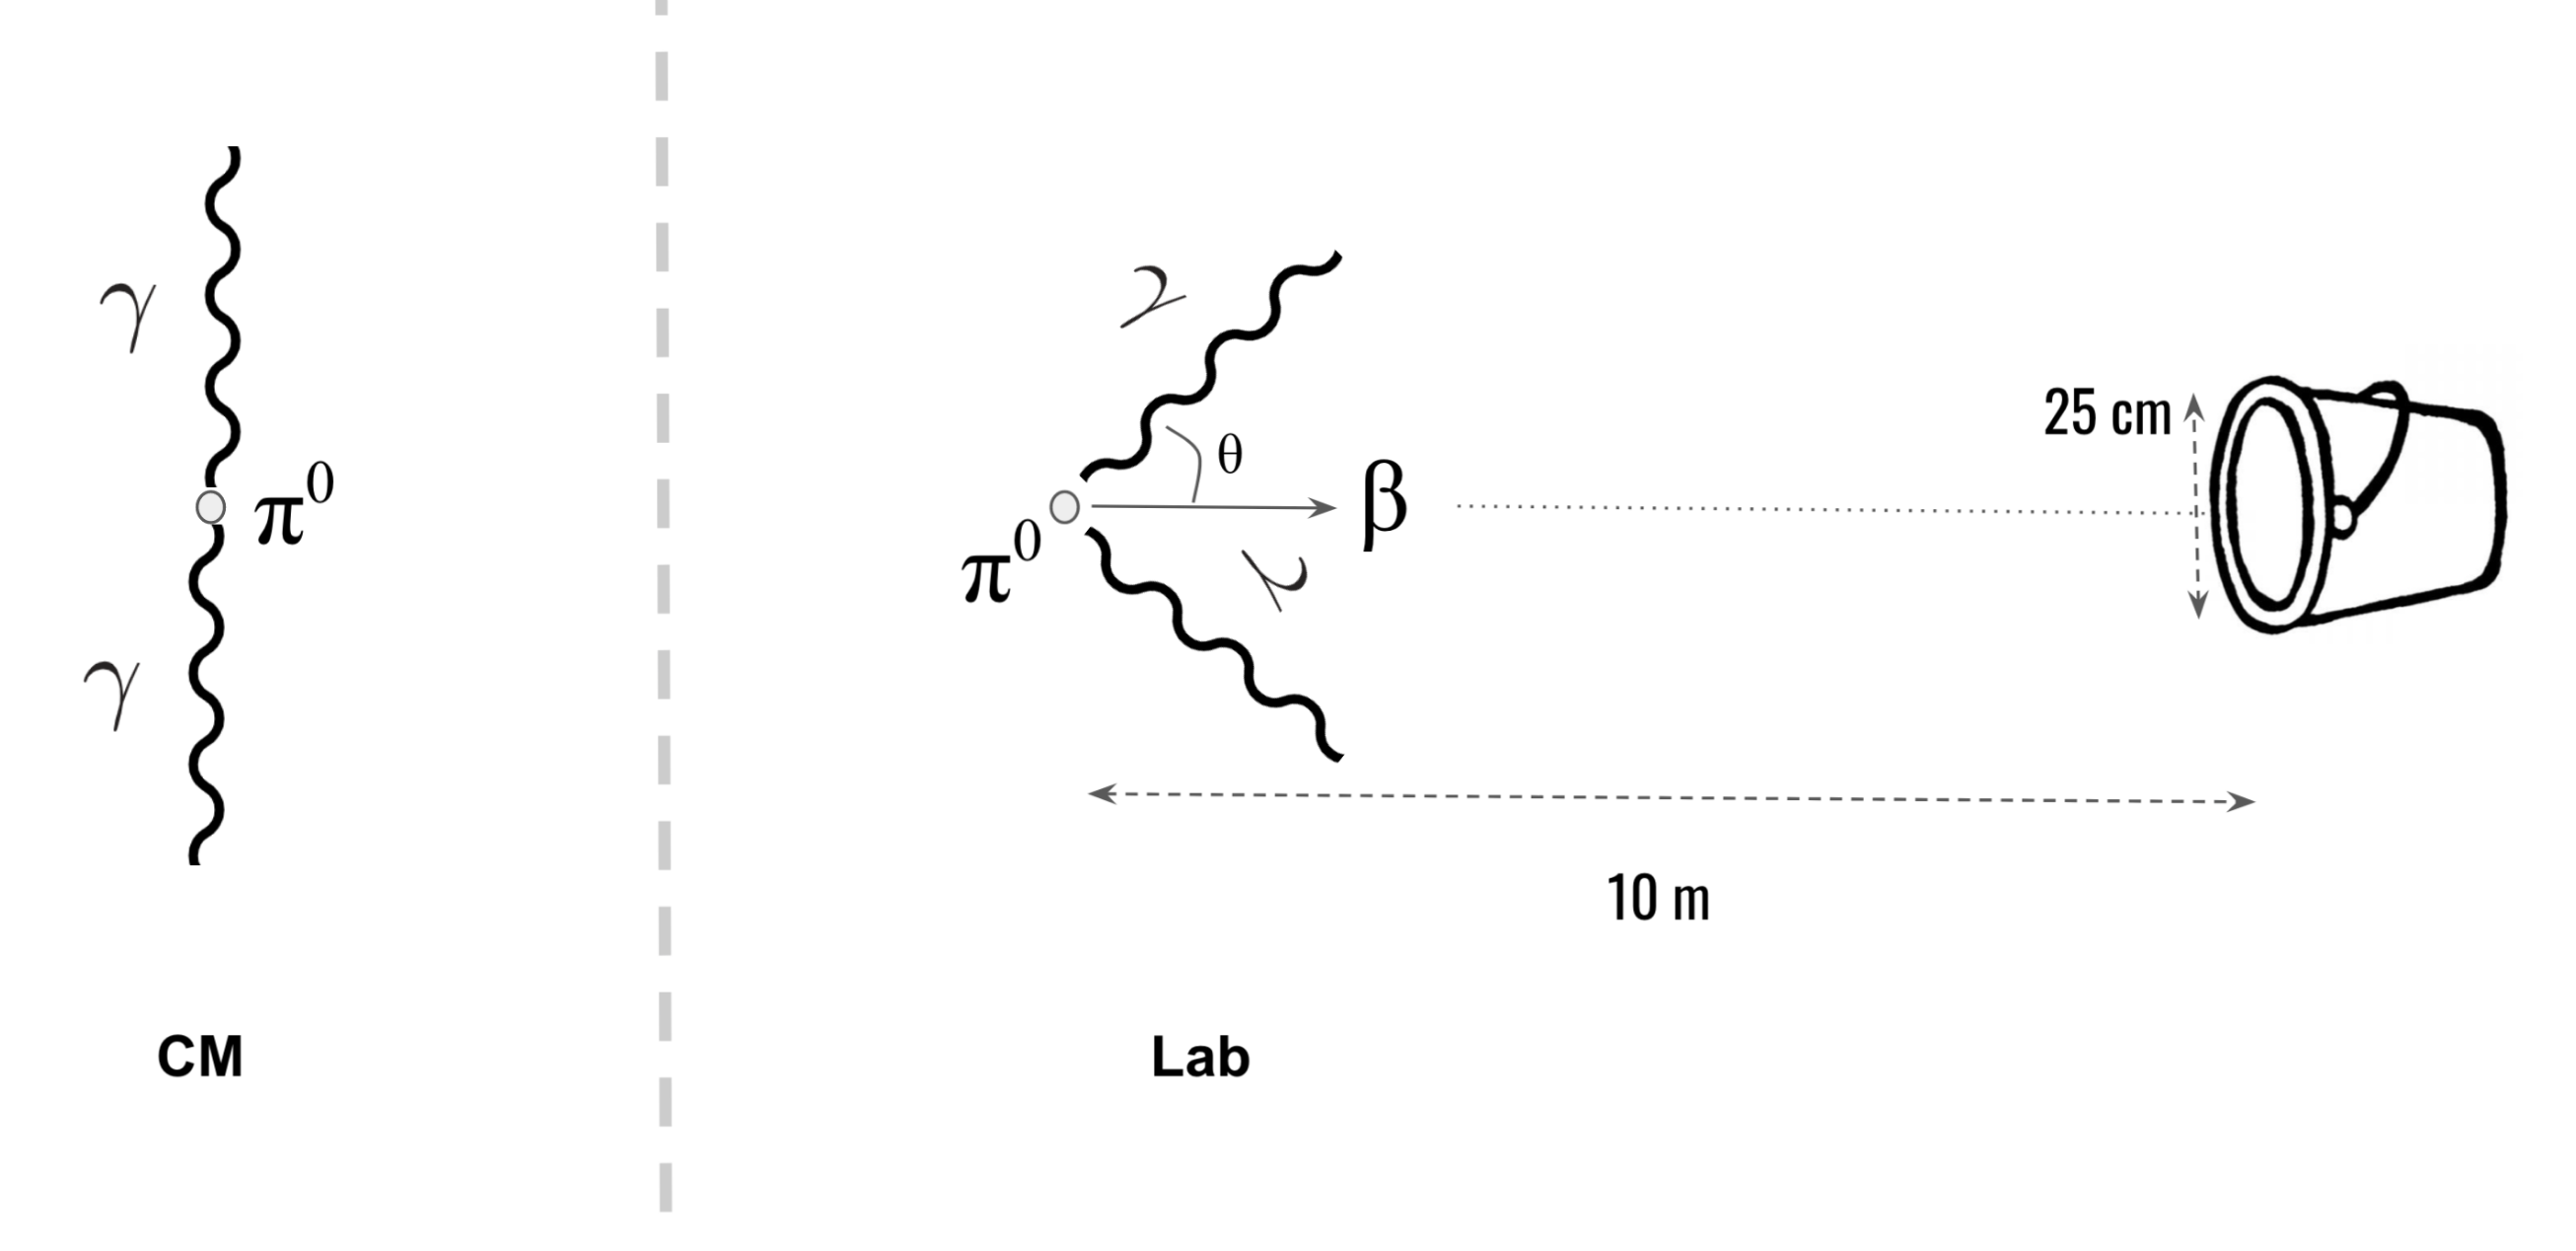

Recuerda que 

$$
\gamma = \frac{1}{\sqrt{1-\beta^2}}, \text{donde } \beta=\frac{v}{c}
$$

**1.1 (*) [1 punto]:** Calcula la mínima velocidad $\beta_{min}$ a la que tiene que ir el pión en el sistema de referencia de Laboratorio para que puedas atrapar los fotones en el cubo que se muestra en la Figura.

In [2]:
# Ejercicio 1.1

# tan \theta = y / x = 0.125/10 = t

# t^{-2} = (\gamma\beta)^2 = \beta^2 / (1-\beta^2) --> t^2\beta^2 = 1-\beta^2 --> \beta = 1/(\sqrt(1+t^2))

t = 0.125/10

bmin = 1/np.sqrt(1+t**2)
print("La velocitat beta_min és {0:}".format(bmin))

La velocitat beta_min és 0.9999218841540815


**1.2 (*) [4 puntos]:** Ahora imagina que tienes infinitos piones que viajan en tren hacia el cubo, con $\beta' = 0.99995$. Estos atraviesan un material antes de decaer y pierden algo de energía antes de desintegrarse en el punto que muestra la figura. El porcentaje de energía perdida (x) sigue esta distribución exponencial:

$$
f(x) = 10\cdot\exp(-x), \text{en porcentaje %}
$$

Vamos a simular muchos casos ($N_{total}$) para estimar la probabilidad $\hat{p}$ de atrapar los dos fotones en el cubo ($N_{entra}$), con una precisión del $0.5\%$. En este caso las desintegraciones suceden todas a $10m$ del cubo, pero cada una con una $\beta$ diferente a $\beta'$... Recuerda que la energía de una partícula relativista es $E = m \gamma c^2$.

**NOTA:** Que un fotón entre en el cubo o no sigue una distribución binomial, donde los estimadores de $\hat{p}$ y varianza de $\hat{p}$ son:

$$
\hat{p} = \frac{N_{entra}}{N_{total}}
\\
$$

$$
var[\hat{p}] = \frac{p(1-p)}{N_{total}} ; \,\,\,\ \sigma[\hat{p}] = \sqrt{var[\hat{p}]}
\\
$$

Para las simulaciones que necesites para alcanzar esta precisión, realiza tres gráficas:

1.   La distribución de velocidades $\beta$ de los piones, para $\beta$ en el intervalo $[0.999,0.99995]$. **[1 punto]**
2.   La evolución de la probabilidad (P en %) con el número de simulaciones. **[1 punto]**
3.   La evolución del error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de simulaciones. **[1 punto]**

Muestra por pantalla cuántas simulaciones necesitas para poder hacer esta estimación de $\hat{p}$ con un error menor del $0.5\%$, y cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$. **[1 punto]**



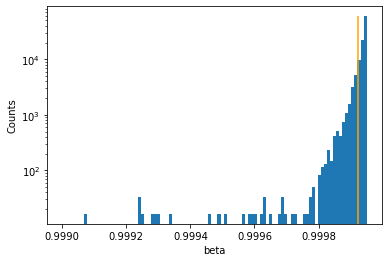

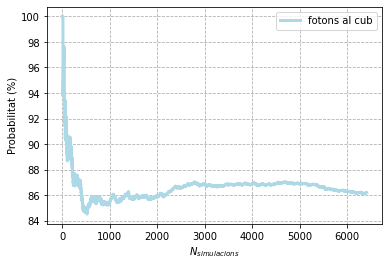

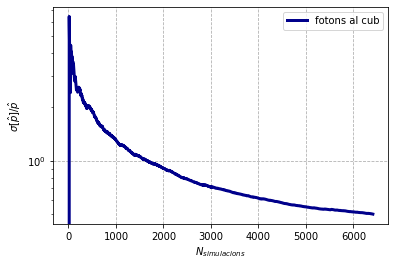

Numero simulacions: 6409
P: 86.19 ± 0.43 %
sigma(p)/p: 0.50 %


In [3]:
# Ejercicio 1.2

N=100000

def en_cubo():
  r = ss.expon.rvs()
  f=10
  p = 1 - f*r/100
  b_p = 0.99995
  g_p = 1/np.sqrt(1-b_p**2)
  G = g_p*p
  B = np.sqrt(1-np.power(G,-2))
  return B

result = []
p2 = []
varp2 = []
stdp2 = []
errp2 = []
nt_b = []

for nt in range(1,N+1):
  result.append(en_cubo())

  p_tmp = sum(map(lambda x : x >= bmin, result))/nt
  p2.append(100.*p_tmp)
  varp2.append(p_tmp*(1-p_tmp)/nt)
  stdp2.append(np.sqrt(p_tmp*(1-p_tmp)/nt))
  errp2.append(100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp)

  nt_b.append(nt)

  if nt > 100 and 100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp< .5: 
    break

n, bins, patches = plt.hist(result,bins=100,range=(0.999,0.99995), density=True)
plt.xlabel('beta')
plt.ylabel('Counts')
plt.vlines(x=bmin, ymin=0, ymax=np.max(n), color='orange')
plt.yscale('log')
plt.show()

plt.plot(nt_b,p2,label="fotons al cub", color='lightblue',lw=3)
plt.xlabel('$N_{simulacions}$')
plt.ylabel('Probabilitat (%)')
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

plt.plot(nt_b,errp2,label="fotons al cub", color='darkblue',lw=3)
plt.xlabel('$N_{simulacions}$')
plt.ylabel('$\sigma[\hat{p}]/\hat{p}$')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

print("Numero simulacions: {}".format(nt_b[-1]))
print("P: {0:.2f} \u00B1 {1:.2f} %".format(p2[-1],100.*stdp2[-1]))
print("sigma(p)/p: {0:.2f} %".format(errp2[-1]))

## <font color='green'>**> Ejercicio #2 [5 puntos]**</font>

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido (líquido o gas), como resultado de choques contra las moléculas de dicho fluido.

El movimiento browniano se encuentra entre los procesos estocásticos más simples. Vamos a considerar la siguiente ecuación principal que genera los puntos que siguen un movimiento browniano:

$\omega \left(\frac{i}{n}\right)=\omega\left(\frac{i-1}{n}\right) + \frac{Y_i}{\sqrt(n)}$

donde $\omega$ es la posición de la partícula (x, y o z) en el paso $i$ de los $n$ que se haya desplazado desde el inicio. $Y_i$ es un proceso estocástico cualquiera, y en este caso vamos a considerar que sigue una distribución gaussiana estándar ($\mu=0$,$\sigma=1$).




**2.1 (*) [1.75 puntos]:** Define una funcion de este movimiento browniano, que devuelva una lista con N puntos de un movimiento 1-D. Dibuja en una gráfica 4 sets de movimiento browniano de 1000 pasos usando esta función: es decir las posiciones vs. número de pasos dados para 4 movimientos diferentes.

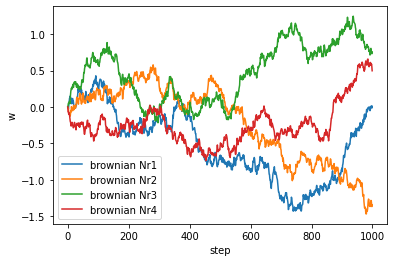

In [5]:
# Ejercicio 2.1

def gen_normal(n_step):
  w = [0]*n_step
  w[0]=0

  for i in range(1,n_step):
    # Sampling from the Normal distribution
    yi = np.random.normal()
    # Weiner process
    w[i] = w[i-1]+(yi/np.sqrt(n_step))
      
  return w

for i in range(4):
    plt.plot(gen_normal(1000), label="brownian Nr"+str(i+1))
plt.ylabel("w")
plt.xlabel("step")
plt.legend(loc='best')
plt.show()

**2.2 (*) [1.75 puntos]:** Genera un movimiento browniano en 2-D utilizando la función de movimiento previamente definida en el apartado anterior. Genera 1000 pares de puntos en 2-D para $x$ e $y$. 

Representa gráficamente el movimiento, comprobando que siga un recorrido aleatorio. Además dibuja un círculo de radio 1. Este movimiento sale del círculo? Si repites la experiencia eres capaz de tener un movimiento totalmente contenido en el círculo?

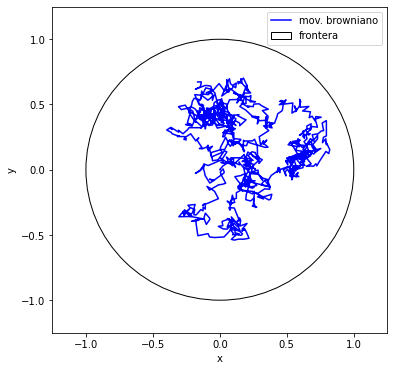

In [8]:
# Ejercicio 2.2

N=1000
x = np.asarray(gen_normal(N))
y = np.asarray(gen_normal(N))

r=1
plt.figure(figsize=(6, 6))
circle=plt.Circle((0.,0.), r, fill = False, label='frontera')
plt.gca().add_patch(circle)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.plot(x,y,c='b', label='mov. browniano')
xmax,xmin,ymax,ymin = max(x.max(),r),min(x.min(),-1*r),max(y.max(),r),min(y.min(),-1*r)
scale_factor = 1.25
xmax,xmin,ymax,ymin = xmax*scale_factor,xmin*scale_factor,ymax*scale_factor,ymin*scale_factor
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**2.3 (*) [1.5 puntos]:** Procede como en el apartado 1.3 y calcula cuál es la probabilidad de tener un movimiento browniano de 1000 pasos totalmente auto-contenido en un círculo de radio 1, con una precisión del 10%.

Para las simulaciones que necesites para alcanzar esta precisión, realiza tres gráficas:

1.   Un histograma de distancias máximas al centro, desde donde parte la partícula, para cada una de las simulaciones.
2.   La evolución de la probabilidad (P en %) con el número de simulaciones.
3.   La evolución del error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de simulaciones.

Muestra por pantalla cuántas simulaciones necesitas para poder hacer esta estimación de $\hat{p}$ con un error menor del $10\%$, y cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


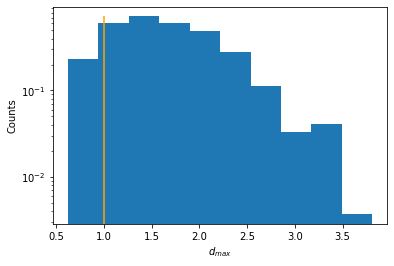

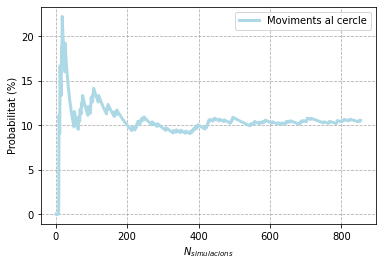

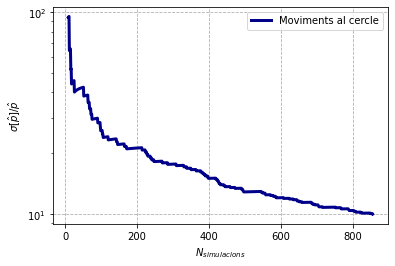

Numero simulacions: 854
P: 10.54 ± 1.05 %
sigma(p)/p: 9.97 %


In [9]:
# Ejercicio 2.3

Nsim=100000

N=1000
r = 1

def distance_to_center(N):
  x = gen_normal(N)
  y = gen_normal(N)

  d = []
  for i in range(0,len(x)):
    d.append(np.sqrt(x[i]**2 +y[i]**2))
  return d

result3 = []
p3 = []
varp3 = []
stdp3 = []
errp3 = []
nt_3 = []
contenida = 0

for nt in range(1,Nsim+1):

  dd = distance_to_center(N)
  result3.append(max(dd))

  if result3[-1] <= r:
    contenida+=1
  p_tmp = contenida/nt
  p3.append(100.*p_tmp)
  varp3.append(p_tmp*(1-p_tmp)/nt)
  stdp3.append(np.sqrt(p_tmp*(1-p_tmp)/nt))
  errp3.append(100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp)

  nt_3.append(nt)

  if nt > 100 and 100.*np.sqrt(p_tmp*(1-p_tmp)/nt)/p_tmp< 10: 
    break

n, bins, patches = plt.hist(result3, density=True)
plt.xlabel('$d_{max}$')
plt.ylabel('Counts')
plt.vlines(x=r, ymin=0, ymax=np.max(n), color='orange')
plt.yscale('log')
plt.show()

plt.plot(nt_3,p3,label="Moviments al cercle", color='lightblue',lw=3)
plt.xlabel('$N_{simulacions}$')
plt.ylabel('Probabilitat (%)')
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

plt.plot(nt_3,errp3,label="Moviments al cercle", color='darkblue',lw=3)
plt.xlabel('$N_{simulacions}$')
plt.ylabel('$\sigma[\hat{p}]/\hat{p}$')
plt.yscale('log', nonposy='clip')
plt.legend()
plt.grid(True, linestyle="--")
plt.show()

print("Numero simulacions: {}".format(nt_3[-1]))
print("P: {0:.2f} \u00B1 {1:.2f} %".format(p3[-1],100.*stdp3[-1]))
print("sigma(p)/p: {0:.2f} %".format(errp3[-1]))
